# Unsupervised Learning with K-Means and PCA


**Mathematical Note on Principal Components:**  
Principal Component Analysis (PCA) transforms the original feature space into a new set of orthogonal axes called **principal components**. These components are ordered by how much variance in the data they explain.

- **PC1** is the linear combination of features that captures the most variance in the dataset.  
- **PC2** is the next orthogonal direction capturing the second most variance.  

Each principal component can be written as:

$$
\text{PC}_j = w_{j1}x_1 + w_{j2}x_2 + \dots + w_{jn}x_n
$$

where $x_i$ are the original features and $w_{ji}$ are the weights (loadings).

While mathematically clear, these components may be **difficult to interpret directly**, as they often blend multiple features (e.g., price, satisfaction, location) into abstract axes of variation.


## Data
The data comes from a cleaned Airbnb dataset of over 40,000 listings in major European cities, containing numerical and categorical information.

## Advantages
- Doesn’t require labels
- Simple and scalable clustering
- Dimensionality reduction for visualization

## Disadvantages
- Assumes spherical clusters
- PCA may lose feature interpretability
- Results vary by scaling and feature selection

## Function
This notebook loads the Airbnb data, preprocesses features, applies PCA, performs K-Means clustering, and visualizes clusters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Aemf1.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [3]:
# select relevant numeric features for clustering
features = ['Price', 'Person Capacity', 'Cleanliness Rating', 'Guest Satisfaction',
            'Bedrooms', 'City Center (km)', 'Metro Distance (km)',
            'Normalised Attraction Index', 'Normalised Restraunt Index']
X = df[features]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)    # scale features

In [5]:
# apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
# apply KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

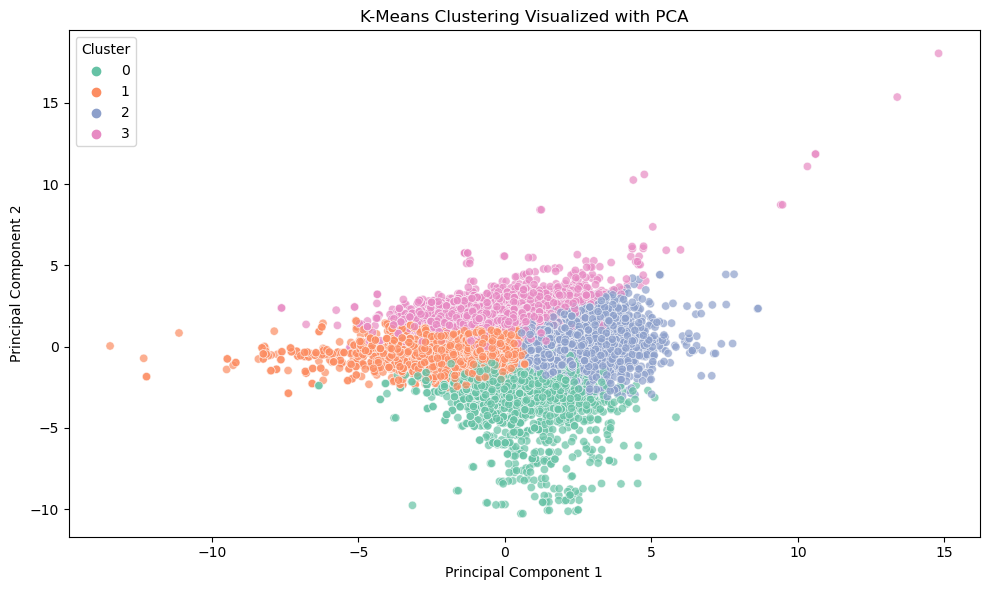

In [7]:
# visualize clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('K-Means Clustering Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Results
- Four distinct clusters were identified using K-Means.
- PCA allowed visual inspection of the clustering structure.
- Features such as satisfaction, pricing, and proximity to the city center contribute significantly to cluster separation.


### Cluster Interpretation

**Cluster 0: Budget City-Fringe Listings (Green)**  
- Low price, lower guest satisfaction, moderate cleanliness  
- Farther from city center and metro  
- Typically 1-bedroom, for 2 or fewer people  
- Low normalized attraction and restaurant indices
- Likely older, budget listings away from city hubs

**Cluster 1: High-End Central Listings (Orange)**  
- High price, high satisfaction, very clean  
- Very close to city center and metro  
- Higher normalized indices for attractions and restaurants  
- Often 1-2 bedrooms, meant for 2+ guests
- Upscale urban apartments near major attractions

**Cluster 2: Moderate Listings with Good Satisfaction (Blue)**  
- Mid-range pricing, solid satisfaction, clean  
- Slightly farther from center, but still accessible  
- Typically 1 bedroom, designed for 2 guests  
- Moderate attraction/restaurant indices
- Balanced options for tourists who value comfort and cleanliness

**Cluster 3: Group-Oriented Suburban Listings (Pink)**  
- Larger person capacity and more bedrooms  
- Mid-to-high price depending on size  
- Located farther from center, but offer space  
- Cleanliness and satisfaction are moderate
- Likely suburban homes or group stays with space over location


## Conclusion
This unsupervised learning workflow reveals patterns in Airbnb listings using PCA and K-Means. It can be used for pricing strategy, customer segmentation, or further exploratory analysis.